In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [48]:
startup_df=pd.read_csv('trial.csv')
startup_df.drop(startup_df.columns[[0,3]], axis=1, inplace=True)
startup_df['total_supply'].fillna(value=startup_df['total_supply'].mean(), inplace=True)
startup_df['total_sales'].fillna(value=startup_df['total_sales'].mean(), inplace=True)
startup_df['volume'].fillna(value=startup_df['volume'].mean(), inplace=True)
startup_df['max_price'].fillna(value=startup_df['max_price'].mean(), inplace=True)
startup_df['floor_price'].fillna(value=startup_df['floor_price'].mean(), inplace=True)
startup_df['holders'].fillna(value=startup_df['holders'].mean(), inplace=True)
startup_df['buyers'].fillna(value=startup_df['buyers'].mean(), inplace=True)
startup_df['sellers'].fillna(value=startup_df['sellers'].mean(), inplace=True)
startup_df['liquidity'].fillna(value=startup_df['liquidity'].mean(), inplace=True)
startup_df['marketcap'].fillna(value=startup_df['marketcap'].mean(), inplace=True)
startup_df['total_transfers'].fillna(value=startup_df['total_transfers'].mean(), inplace=True)
startup_df['avg_community_sentiment'].fillna(value=startup_df['avg_community_sentiment'].mean(), inplace=True)


startup_df['total_supply'] = startup_df['total_supply'].astype('Float32')
startup_df['total_sales'] = startup_df['total_sales'].astype('Float32')
startup_df['volume'] = startup_df['volume'].astype('Float32')
startup_df['max_price'] = startup_df['max_price'].astype('Float32')
startup_df['floor_price'] = startup_df['floor_price'].astype('Float32')
startup_df['holders'] = startup_df['holders'].astype('Float32')
startup_df['buyers'] = startup_df['buyers'].astype('Float32')
startup_df['sellers'] = startup_df['sellers'].astype('Float32')
startup_df['liquidity'] = startup_df['liquidity'].astype('Float32')
startup_df['marketcap'] = startup_df['marketcap'].astype('Float32')
startup_df['total_transfers'] = startup_df['total_transfers'].astype('Float32')
startup_df['avg_community_sentiment'] = startup_df['avg_community_sentiment'].astype('Float32')


In [49]:
startup_df

,total_supply,total_sales,max_price,floor_price,holders,buyers,sellers,liquidity,marketcap,total_transfers,avg_community_sentiment,volume
0,10000.0,26700.0,160000004361027584.0,160000004361027584.0,21565.0,10647.0,8125.0,267.0,277000001962517070872576.0,77191.0,215.79129,738999986310866964316160.0
1,10000.0,26700.0,160000004361027584.0,160000004361027584.0,21565.0,10647.0,8125.0,267.0,277000001962517070872576.0,77191.0,215.79129,738999986310866964316160.0
2,10000.0,26700.0,160000004361027584.0,160000004361027584.0,21565.0,10647.0,8125.0,267.0,277000001962517070872576.0,77191.0,203.884644,738999986310866964316160.0
3,10000.0,26700.0,160000004361027584.0,160000004361027584.0,21565.0,10647.0,8125.0,267.0,277000001962517070872576.0,77191.0,203.884644,738999986310866964316160.0
4,10000.0,26700.0,160000004361027584.0,160000004361027584.0,21565.0,10647.0,8125.0,267.0,277000001962517070872576.0,77191.0,183.894791,738999986310866964316160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5252,10000.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,117860120982609863901184.0,30.0,45.051933,0.0
5253,10000.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,117860120982609863901184.0,30.0,45.051933,0.0
5254,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117860120982609863901184.0,0.0,45.051933,0.0
5255,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117860120982609863901184.0,0.0,45.051933,0.0


In [50]:
shape=startup_df.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 5257 rows and 12 columns


In [62]:
x=startup_df.iloc[:,:10]
y=startup_df.iloc[:,11]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (4205, 11)
X_test: (1052, 11)
Y_train: (4205,)
Y_test: (1052,)


In [54]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=linreg.predict(x_test)
y_pred

array([2.36319520e+23, 7.13294614e+23, 2.32792400e+23, ...,
       3.20179227e+22, 3.55156314e+23, 3.93140695e+23])

In [56]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.75


In [57]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [58]:
pred_df

,Actual Value,Predicted Value,Difference
2769,223000004961696856670208.0,2.363195e+23,-13319514660891678212096.0
138,731000008105588129005568.0,7.132946e+23,17705394024164483923968.0
2778,219999995120318783946752.0,2.327924e+23,-12792404974276251222016.0
1367,422000003249963169480704.0,4.284119e+23,-6411887243689984000000.0
660,561999982130312977055744.0,5.505045e+23,11495488831029235417088.0
...,...,...,...
906,498999991634155563646976.0,4.962411e+23,2758920805021277749248.0
1662,396000002025212916793344.0,4.039933e+23,-7993338581652399456256.0
4148,40300001898362891665408.0,3.201792e+22,8282079214130050367488.0
1912,345000014865770775314432.0,3.551563e+23,-10156299281673232580608.0


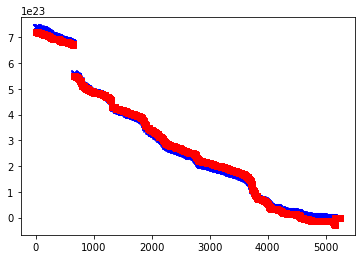

In [59]:
plt.scatter(pred_df.index.values, pred_df['Actual Value'], c='b', marker='x', label='1')
plt.scatter(pred_df.index.values, pred_df['Predicted Value'], c='r', marker='s', label='-1')